### Machine learning for mental Health

##### The project involves machine learning models that can assist in predicting mental health conditions, analyzing mental health-related data and creating tools that help in diagnosing or monitoring mental health conditions.


##### Our main objective is to predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset 



### ----------------------- Dataset Content--------------------------
This dataset contains the following data:
Timestamp
Age
Gender
Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

Output Label is = seek_help 

#### Imports

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns



#### Data Preprocessing

In [145]:
path = 'survey.csv'
data = pd.read_csv(path)

In [146]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [147]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [149]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [150]:
data.drop(['comments', 'state', 'Timestamp'],  axis=1, inplace=True)

In [151]:
data.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [152]:
# Assuming your DataFrame is called 'Data'
missing_percentages = (data.isna().mean() * 100).round(2)

print(missing_percentages)

Age                           0.00
Gender                        0.00
Country                       0.00
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
dtype: float64


##### Cleaning the NaN values

In [153]:
df_clean = data

In [154]:
df_clean.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

Now, our data does not contain any missing values !!

##### Encoding data

In [155]:
# Iterate through each column in the DataFrame
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f'Column "{column}" has {len(unique_values)} unique values: {unique_values}')

Column "Age" has 53 unique values: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Column "Gender" has 49 unique values: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Ag

In [156]:
# LabelEncoder from scikit-learn
le = LabelEncoder()

0- Work interference

In [157]:
df_clean['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [158]:

# Encode non-NaN values in the 'work_interfere' column
df_clean.loc[df_clean['work_interfere'].notnull(), 'work_interfere'] = le.fit_transform(df_clean.loc[df_clean['work_interfere'].notnull(), 'work_interfere'])

# Check the unique values in the 'work_interfere' column
df_clean['work_interfere'].unique()


array([1, 2, 0, 3, nan], dtype=object)

1 - Age column

In [159]:
unique_values_age = df_clean['Age'].unique()
print(unique_values_age)

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [160]:
# Fill with media() values < 18 and > 120
df_clean.loc[df_clean['Age'] < 18, 'Age'] = df_clean['Age'].median()
df_clean.loc[df_clean['Age'] > 120, 'Age'] = df_clean['Age'].median()

In [161]:
df_clean['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

Now, our age column is encoded and has no invalid values

2 - Gender column

In [162]:
male_str = ['male','m', 'cis male','male leaning androgynous','male-ish', 'maile', 'mal', 'male (cis)', 'male ','guy (-ish) ^_^','make','something kinda male?','man', 'msle', 'mail', 'malr','cis man']
female_str = ['female', 'female ', 'cis female', 'f', 'femake', 'female (cis)','woman', 'femail', 'cis-female/femme', 'female (trans)','trans woman', 'trans-female', 'woman','queer','queer/she/they']

df_clean['Gender'] = df_clean['Gender'].str.lower()
df_clean.loc[df_clean['Gender'].isin(male_str), 'Gender'] = 'male'
df_clean.loc[df_clean['Gender'].isin(female_str), 'Gender'] = 'female'

#Get rid of bullshit
stk_list = ['non-binary','nah','all','enby','fluid','genderqueer','androgyne','agender' ,'neuter','a little about you','p','ostensibly male, unsure what that really means']
df_clean = df_clean[~df_clean['Gender'].isin(stk_list)]
print(df_clean['Gender'].unique())

['female' 'male']


In [163]:
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])
df_clean['Gender'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/1858732997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'] = le.fit_transform(df_clean['Gender'])


array([0, 1])

3 - Self employed 

In [164]:
df_clean['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [165]:

df_clean.loc[df_clean['self_employed'].notnull(), 'self_employed'] = le.fit_transform(df_clean.loc[df_clean['self_employed'].notnull(), 'self_employed'])

# Check the unique values in the 'work_interfere' column
df_clean['self_employed'].unique()


array([nan, 1, 0], dtype=object)

4 - family history

In [166]:
df_clean['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [167]:
df_clean['family_history'] = le.fit_transform(df_clean['family_history'])
df_clean['family_history'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/200455930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['family_history'] = le.fit_transform(df_clean['family_history'])


array([0, 1])

5 - Country 

In [168]:
df_clean['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [169]:
df_clean['Country'] = le.fit_transform(df_clean['Country'])
df_clean['Country'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/2555295537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country'] = le.fit_transform(df_clean['Country'])


array([44,  6, 43,  5, 14, 33, 27, 41, 32,  0, 16, 35, 25,  4, 37,  9,  1,
       20, 19, 38, 22, 40,  8, 24, 34,  2, 28, 39, 13, 45, 21,  3, 18, 36,
       23, 29, 10, 30, 42, 12, 17, 26, 15,  7, 11, 31])

6 - Treatment

In [170]:
df_clean['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [171]:
df_clean['treatment'] = le.fit_transform(df_clean['treatment'])
df_clean['treatment'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/4281228604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['treatment'] = le.fit_transform(df_clean['treatment'])


array([1, 0])

7 - no_employees                  

In [172]:
df_clean['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [173]:
# fit and transform the 'no_employees' column
df_clean['no_employees'] = le.fit_transform(df_clean['no_employees'])
df_clean['no_employees'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/3159229882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['no_employees'] = le.fit_transform(df_clean['no_employees'])


array([4, 5, 2, 1, 0, 3])

8 - remote_work                   

In [174]:
df_clean['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

In [175]:
df_clean['remote_work'] = le.fit_transform(df_clean['remote_work'])
df_clean['remote_work'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/1014869372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['remote_work'] = le.fit_transform(df_clean['remote_work'])


array([0, 1])

9 - tech_company                  

In [176]:
df_clean['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [177]:
df_clean['tech_company'] = le.fit_transform(df_clean['tech_company'])
df_clean['tech_company'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/3229739187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tech_company'] = le.fit_transform(df_clean['tech_company'])


array([1, 0])

10 - benefits                      

In [178]:
df_clean['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [179]:
df_clean['benefits'] = le.fit_transform(df_clean['benefits'])
df_clean['benefits'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/2953674779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['benefits'] = le.fit_transform(df_clean['benefits'])


array([2, 0, 1])

11 - care_options                  

In [180]:
df_clean['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [181]:
df_clean['care_options'] = le.fit_transform(df_clean['care_options'])
df_clean['care_options'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/1475071428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['care_options'] = le.fit_transform(df_clean['care_options'])


array([1, 0, 2])

12 - wellness_program              


In [182]:
df_clean['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [183]:
df_clean['wellness_program'] = le.fit_transform(df_clean['wellness_program'])

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/2650442787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['wellness_program'] = le.fit_transform(df_clean['wellness_program'])


13 - seek_help                     


In [184]:
df_clean['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [185]:
df_clean['seek_help'] = le.fit_transform(df_clean['seek_help'])
df_clean['seek_help'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/1170463923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['seek_help'] = le.fit_transform(df_clean['seek_help'])


array([2, 0, 1])

14 - anonymity                     


In [186]:
df_clean['anonymity'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [187]:
df_clean['anonymity'] = le.fit_transform(df_clean['anonymity'])
df_clean['anonymity'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/3772412165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anonymity'] = le.fit_transform(df_clean['anonymity'])


array([2, 0, 1])

15 - leave                         


In [188]:
df_clean['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [189]:
df_clean['leave'] = le.fit_transform(df_clean['leave'])
df_clean['leave'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/3159690820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['leave'] = le.fit_transform(df_clean['leave'])


array([2, 0, 1, 3, 4])

16 - mental_health_consequence     


In [190]:
df_clean['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [191]:
df_clean['mental_health_consequence'] = le.fit_transform(df_clean['mental_health_consequence'])
df_clean['mental_health_consequence'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/1804768319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mental_health_consequence'] = le.fit_transform(df_clean['mental_health_consequence'])


array([1, 0, 2])

17 - phys_health_consequence      

In [192]:
df_clean['phys_health_consequence'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [193]:
df_clean['phys_health_consequence'] = le.fit_transform(df_clean['phys_health_consequence'])
df_clean['phys_health_consequence'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/3962114245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['phys_health_consequence'] = le.fit_transform(df_clean['phys_health_consequence'])


array([1, 2, 0])

18 - coworkers                     

In [194]:
df_clean['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [195]:
df_clean['coworkers'] = le.fit_transform(df_clean['coworkers'])
df_clean['coworkers'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/3371294665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['coworkers'] = le.fit_transform(df_clean['coworkers'])


array([1, 0, 2])

19 - supervisor                    


In [196]:
df_clean['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [197]:
df_clean['supervisor'] = le.fit_transform(df_clean['supervisor'])
df_clean['supervisor'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/4019265957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['supervisor'] = le.fit_transform(df_clean['supervisor'])


array([2, 0, 1])

20 - mental_health_interview      


In [198]:
df_clean['mental_health_interview'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [199]:
df_clean['mental_health_interview'] = le.fit_transform(df_clean['mental_health_interview'])
df_clean['mental_health_interview'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/2333185123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mental_health_interview'] = le.fit_transform(df_clean['mental_health_interview'])


array([1, 2, 0])

21 - phys_health_interview        

In [200]:
df_clean['phys_health_interview'].unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [201]:
df_clean['phys_health_interview'] = le.fit_transform(df_clean['phys_health_interview'])
df_clean['phys_health_interview'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/672360552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['phys_health_interview'] = le.fit_transform(df_clean['phys_health_interview'])


array([0, 1, 2])

22 - mental_vs_physical            


In [202]:
df_clean['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [203]:
df_clean['mental_vs_physical'] = le.fit_transform(df_clean['mental_vs_physical'])
df_clean['mental_vs_physical'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/1620546154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mental_vs_physical'] = le.fit_transform(df_clean['mental_vs_physical'])


array([2, 0, 1])

23 - obs_consequence 

In [204]:
df_clean['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [205]:
df_clean['obs_consequence'] = le.fit_transform(df_clean['obs_consequence'])
df_clean['obs_consequence'].unique()

/var/folders/rr/62tz31v139gdkk0h36fmvq240000gn/T/ipykernel_21124/2135739759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['obs_consequence'] = le.fit_transform(df_clean['obs_consequence'])


array([0, 1])

##### Filling the missing data

1. Work interfere

In [206]:
# df_clean['work_interfere'] = df_clean['work_interfere'].fillna(df_clean['work_interfere'].median())
# df_clean["work_interfere"].unique()

In [207]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# df_clean.head()
# null_values = df_clean[df_clean['work_interfere'].isnull()==True]
# traindf = df_clean.dropna()
# y = traindf['work_interfere']
# traindf.drop("work_interfere",axis=1,inplace=True)
# lr.fit(traindf,y)
# null_values.drop("work_interfere",axis=1,inplace=True)
# pred = lr.predict(null_values)
# null_values['work_interfere']= pred
# df_clean[df_clean['work_interfere'].isnull()==True] = null_values

In [208]:
from sklearn.linear_model import LinearRegression


# Separate columns with missing values from those without missing values
missing_cols = ['work_interfere', 'self_employed']
other_cols = [col for col in df_clean.columns if col not in missing_cols]

# Create a linear regression model for each missing column
for col in missing_cols:
    # Split the data into training and test sets
    train_data = df_clean.dropna(subset=[col] + other_cols)
    test_data = df_clean[df_clean[col].isna()].drop(col, axis=1)
    test_data = test_data[other_cols] # Add missing feature column
    
    # Create the linear regression object
    reg = LinearRegression()
    
    # Fit the model to the training data
    reg.fit(train_data[other_cols], train_data[col])
    
    # Predict the missing values
    df_clean.loc[df_clean[col].isna(), col] = reg.predict(test_data)


2. Self employed

In [209]:
# df_clean['self_employed'] = df_clean['self_employed'].fillna(df_clean['self_employed'].median())
# df_clean['self_employed'].unique()

In [210]:

# lr = LinearRegression()
# df_clean.head()
# testdf = df_clean[df_clean['self_employed'].isnull()==True]
# traindf = df_clean.dropna()
# y = traindf['self_employed']
# traindf.drop("self_employed",axis=1,inplace=True)
# lr.fit(traindf,y)
# testdf.drop("self_employed",axis=1,inplace=True)
# pred = lr.predict(testdf)
# testdf['self_employed']= pred
# df_clean[df_clean['self_employed'].isnull()==True] = testdf

### Explore and visualize data : exploratory data analysis (EDA)


In [211]:
df_clean.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0.039959,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,-0.085086,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0.045845,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0.147979,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0.180743,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


In [212]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1247 non-null   int64 
 1   Gender                     1247 non-null   int64 
 2   Country                    1247 non-null   int64 
 3   self_employed              1247 non-null   object
 4   family_history             1247 non-null   int64 
 5   treatment                  1247 non-null   int64 
 6   work_interfere             1247 non-null   object
 7   no_employees               1247 non-null   int64 
 8   remote_work                1247 non-null   int64 
 9   tech_company               1247 non-null   int64 
 10  benefits                   1247 non-null   int64 
 11  care_options               1247 non-null   int64 
 12  wellness_program           1247 non-null   int64 
 13  seek_help                  1247 non-null   int64 
 14  anonymity    

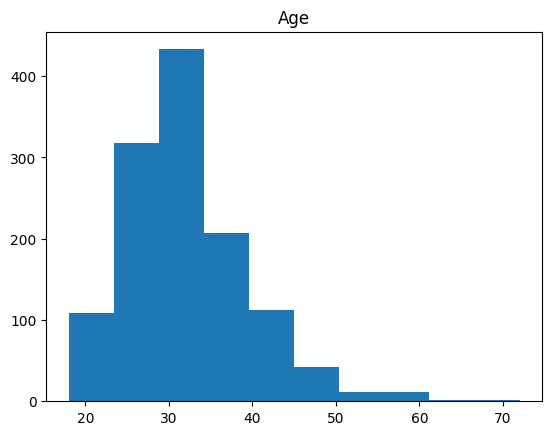

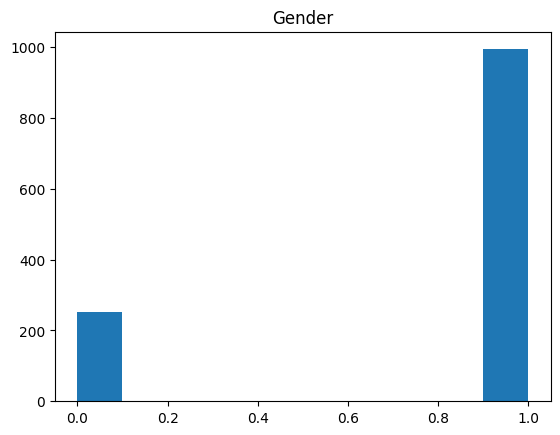

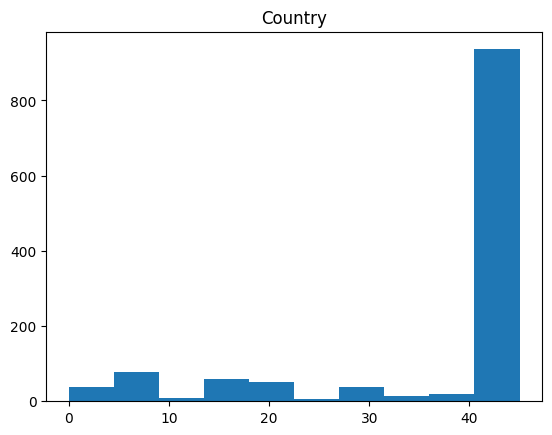

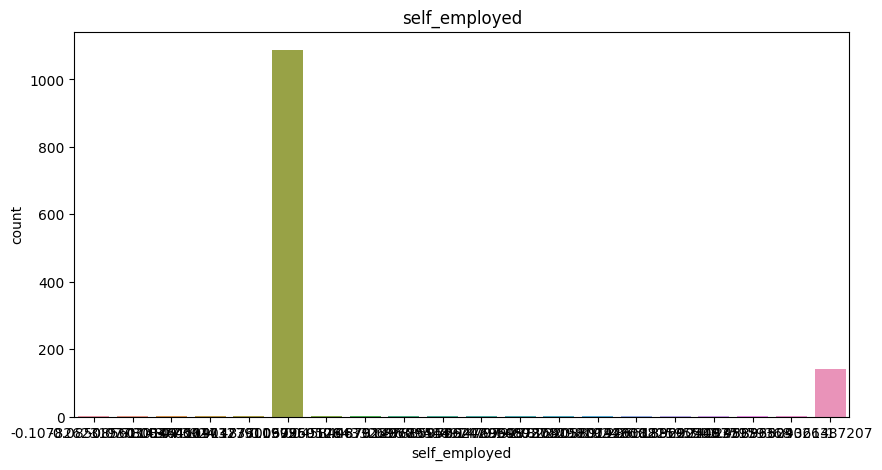

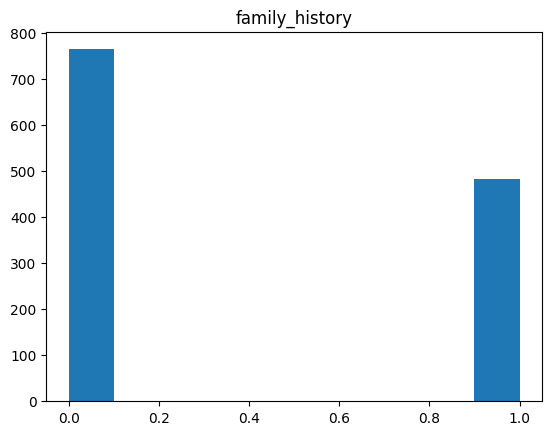

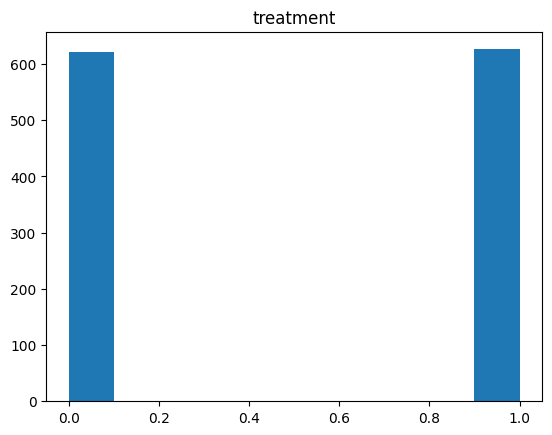

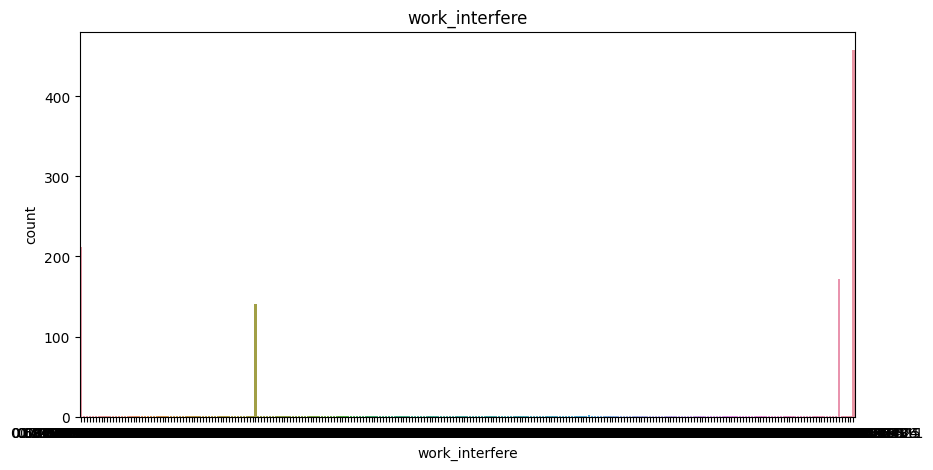

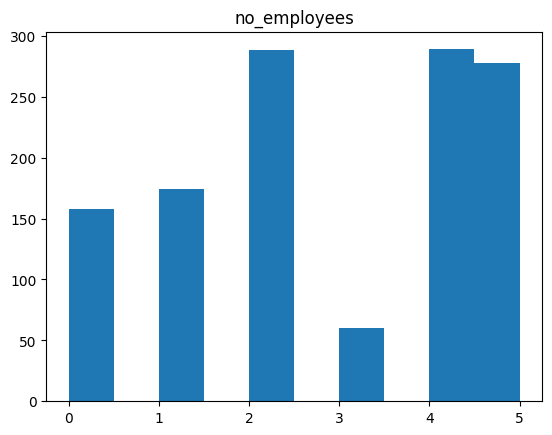

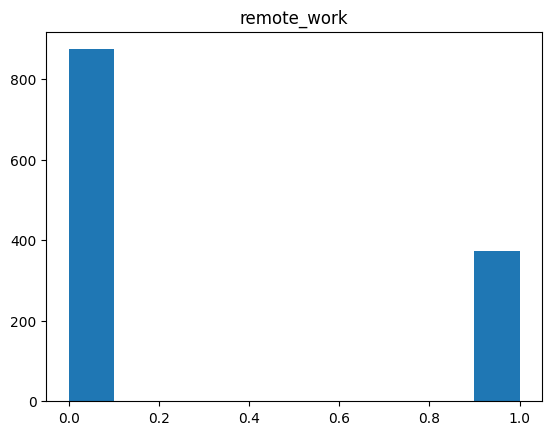

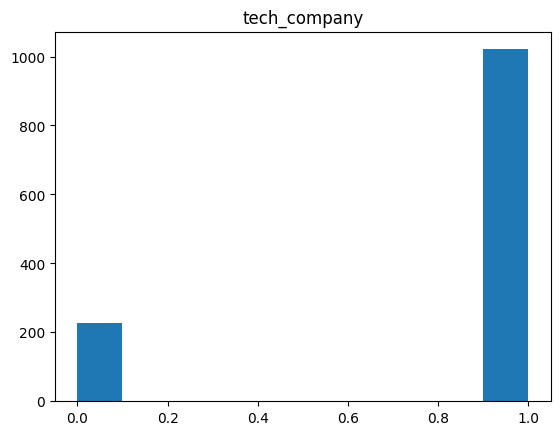

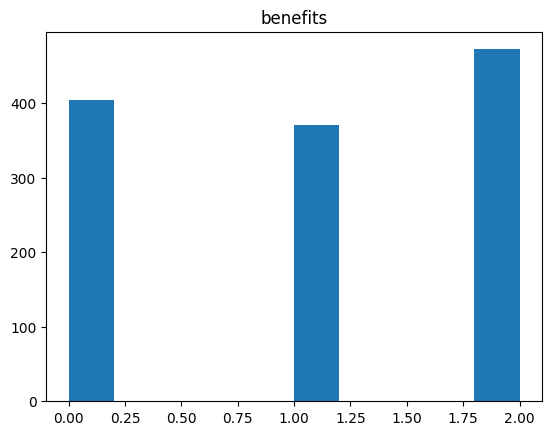

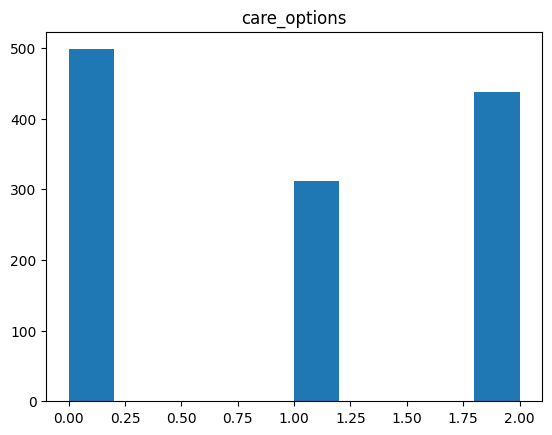

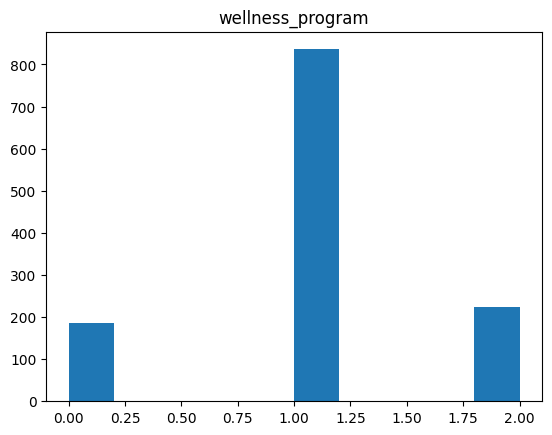

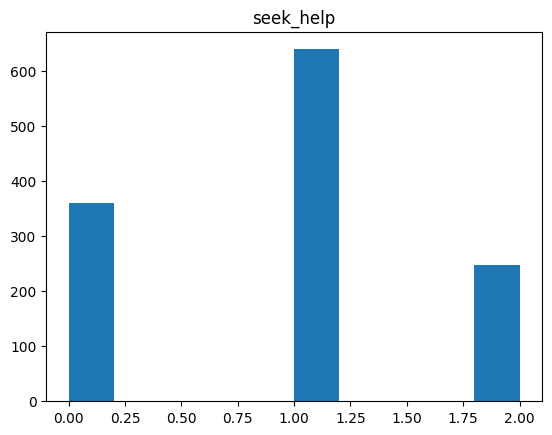

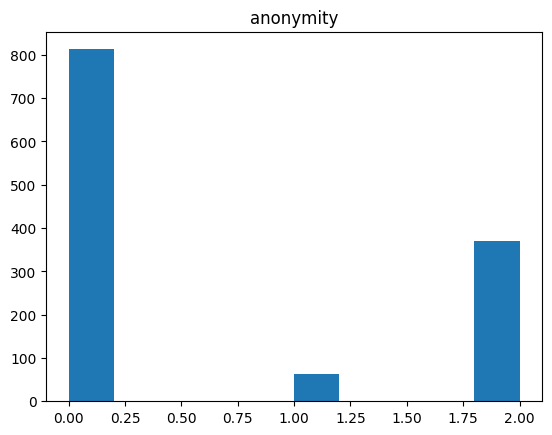

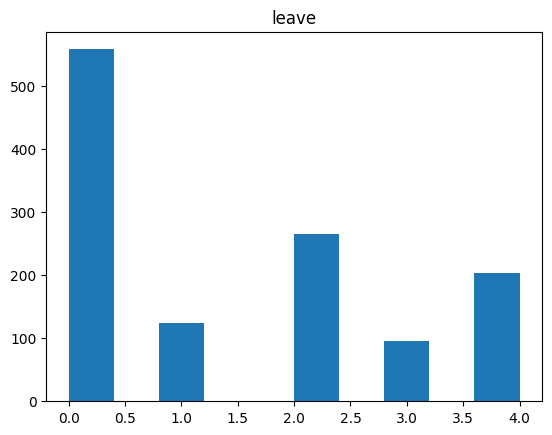

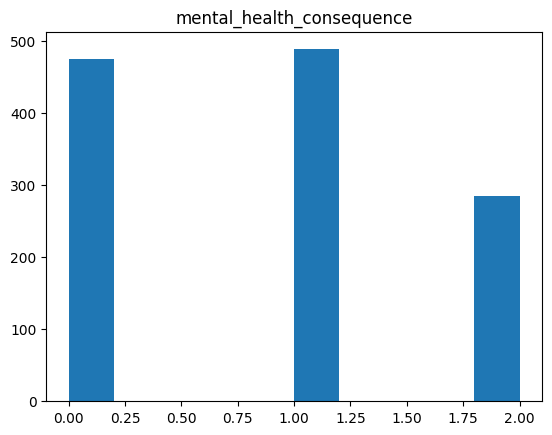

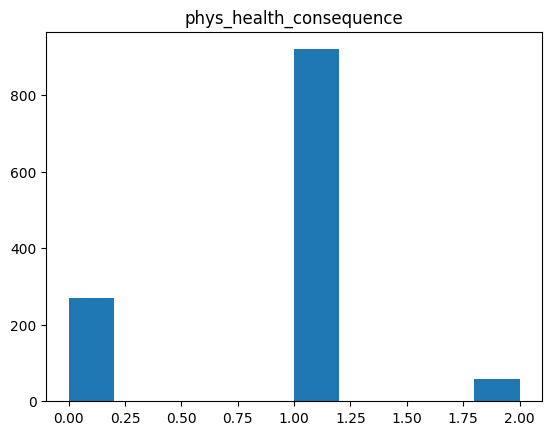

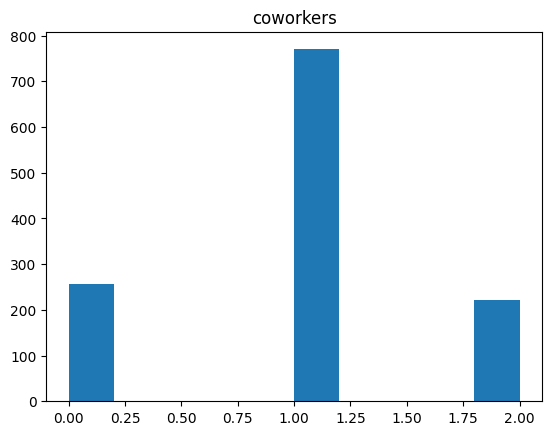

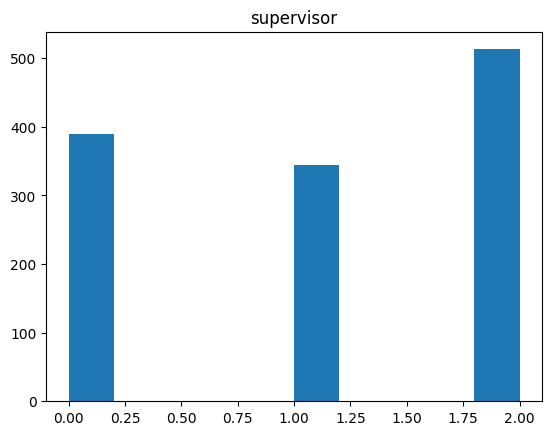

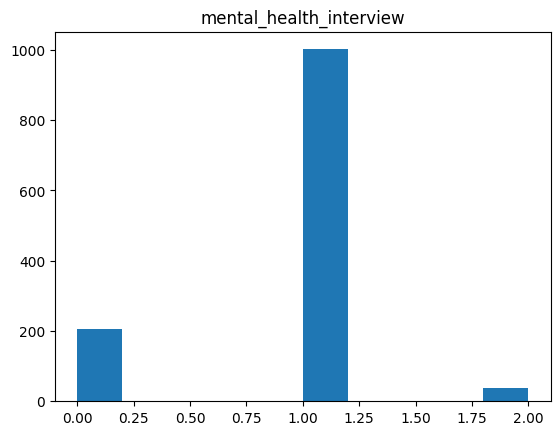

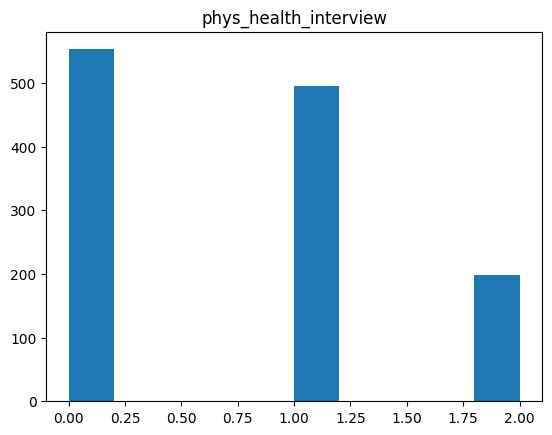

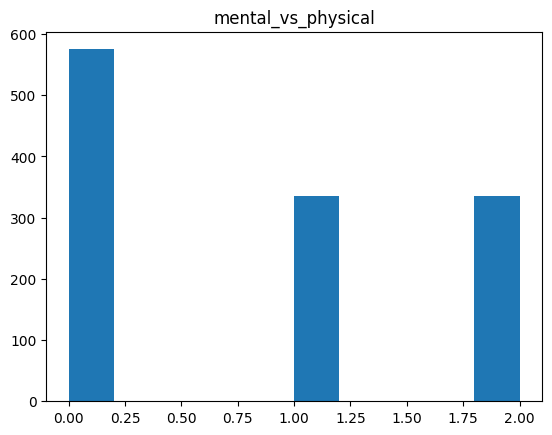

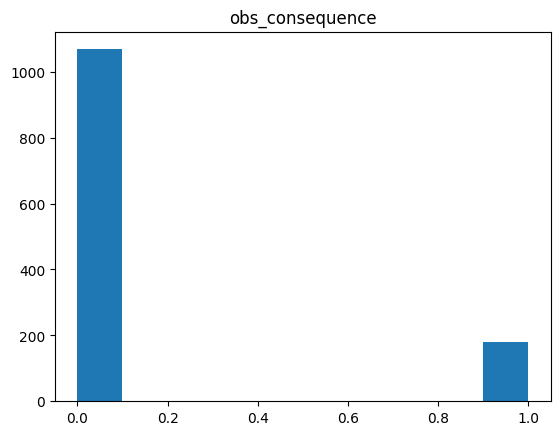

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# iterate over each column
for col in df_clean.columns:
    # check if the column is numerical
    if df_clean[col].dtype in ['int64', 'float64']:
        # plot a histogram
        plt.hist(df_clean[col])  #It was df[col] but the problem there is no df in the notebook
        plt.title(col)
        plt.show()
       
    # if the column is categorical
    else:
        # plot a bar chart
        fig = plt.figure(figsize=(10, 5))
        sns.countplot(x=df_clean[col])
        plt.title(col)
        plt.show()


In [214]:
"""#correlation matrix
corr_matrix = df_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'treatment')['treatment'].index

if len(cols) > 1:
    cm = np.corrcoef(df_clean[cols].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(12, 9))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
else:
    print("cols contains only one column:", cols)"""

'#correlation matrix\ncorr_matrix = df_clean.corr()\nf, ax = plt.subplots(figsize=(12, 9))\nsns.heatmap(corr_matrix, vmax=.8, square=True)\nplt.show()\n\n#treatment correlation matrix\nk = 10 #number of variables for heatmap\ncols = corr_matrix.nlargest(k, \'treatment\')[\'treatment\'].index\n\nif len(cols) > 1:\n    cm = np.corrcoef(df_clean[cols].values.T)\n    sns.set(font_scale=1.25)\n    f, ax = plt.subplots(figsize=(12, 9))\n    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=\'.2f\', annot_kws={\'size\': 10}, yticklabels=cols.values, xticklabels=cols.values)\n    plt.show()\nelse:\n    print("cols contains only one column:", cols)'

### Spliltting the dataset

In [215]:
X = df_clean.drop('treatment', axis=1)  # all columns except 'Treatment'
y = df_clean['treatment']              # only 'Treatment' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



#### Scaling and Normalization 

In [216]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [217]:
X_train_scaled

array([[-0.86128449,  0.50644264, -1.59071585, ..., -1.00012019,
        -0.97061503, -0.41667788],
       [ 0.66776249,  0.50644264,  0.54083117, ..., -1.00012019,
        -0.97061503, -0.41667788],
       [-0.72228022,  0.50644264, -1.21008245, ..., -1.00012019,
         0.22991874,  2.3999354 ],
       ...,
       [-0.44427168,  0.50644264,  0.23632445, ...,  1.75970515,
        -0.97061503,  2.3999354 ],
       [ 1.50178811,  0.50644264, -0.90557574, ..., -1.00012019,
        -0.97061503, -0.41667788],
       [ 1.22377957,  0.50644264,  0.46470449, ..., -1.00012019,
        -0.97061503, -0.41667788]])

### Model Selection 

For our binary classification models, we will select the best model from all the classification models below after trying all of them, one by one and check their accuracy.

- Logistic Regression is a statistical model that uses a logistic function to model a binary dependent variable. It is a popular algorithm for binary classification problems. ✅

- Decision Trees: Decision trees are tree-like models that use a series of decisions to classify data. Decision trees can handle both categorical and continuous data. ✅

- Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and stability of the model. It is one of the most popular algorithms for binary classification problems.

- Naive Bayes: Naive Bayes is a probabilistic algorithm that calculates the probability of a data point belonging to a particular class based on the conditional probabilities of each feature. ✅

- Support Vector Machines (SVM): SVM is a linear classification algorithm that finds the best hyperplane to separate data points into different classes.

- Gradient Boosted Trees: Gradient Boosted Trees are another ensemble learning method that combines multiple decision trees to improve model accuracy. Gradient Boosted Trees are especially useful for handling imbalanced datasets. ✅

- Neural Networks: Neural networks are a set of algorithms that can learn and recognize patterns in data. They are used for both binary and multi-class classification problems. ✅


1 - Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an instance of the LogisticRegression class
model = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.0001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}

# Perform a grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters: {}".format(grid_search.best_params_))

# Print the best cross-validation score
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Print the test set accuracy
print("Test set accuracy: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))


Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.77
Test set accuracy: 0.76


AUC: 0.7161089538602102


/Users/cheimamezdour/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


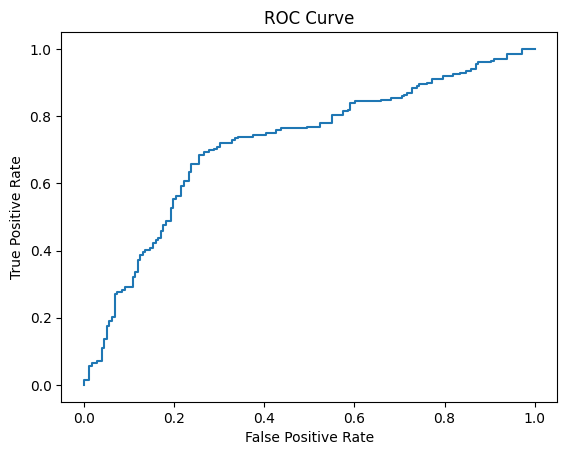

In [219]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for the testing data
y_proba = model.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC on the testing data
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

2. Random Forest

In [220]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Create a Random Forest classifier with 500 trees
rfc = RandomForestClassifier(n_estimators=500)

# Tune hyperparameters using randomized search
param_distributions = {
    'max_depth': [None, 50],
    'max_features': [24],
    'min_samples_split': [30],
    'min_samples_leaf': [4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(rfc, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)

# Train the classifier on the best hyperparameters
rfc = RandomForestClassifier(**random_search.best_params_)
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = rfc.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


/Users/cheimamezdour/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'min_samples_split': 30, 'min_samples_leaf': 4, 'max_features': 24, 'max_depth': None, 'bootstrap': True}
Accuracy: 81.07%


3. SVM

In [221]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier

# perform grid search to find the best hyperparameters
parameters = {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
svm = SVC()
grid_search = GridSearchCV(svm, parameters)
grid_search.fit(X_train, y_train)
svm = grid_search.best_estimator_

# use bagging as an ensemble method
bagging = BaggingClassifier(svm, n_estimators=10, random_state=0)
bagging.fit(X_train, y_train)

# perform cross-validation to evaluate the model
cv_scores = cross_val_score(bagging, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Average score:", cv_scores.mean())

# predict the labels of the test data
y_pred = bagging.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy
print("Accuracy:", accuracy)


Cross-validation scores: [0.75       0.75       0.8045977  0.79310345 0.79310345 0.79310345
 0.83908046 0.71264368 0.71264368 0.7816092 ]
Average score: 0.7729885057471265
Accuracy: 0.7546666666666667


4. Neural network

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the neural network architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/100


2023-04-27 18:46:43.306268: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


28/28 [==============================] - 0s 4ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 7.5533 - accuracy: 0.5103 - val_loss: 8.1855 - val_accuracy: 0.4693
Epoch 8/100
28/28 [======

a - Precision, Recall, F1-score

These are three common metrics used for evaluating classification models that deal with imbalanced datasets.

In [224]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score on the testing data
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       176
           1       0.77      0.76      0.77       199

    accuracy                           0.75       375
   macro avg       0.75      0.75      0.75       375
weighted avg       0.76      0.75      0.75       375



b - Confusion Matrix

This is a table that shows the number of true positives, false positives, true negatives, and false negatives. It can help you understand the types of errors your model is making.

In [225]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix on the testing data
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[132  44]
 [ 48 151]]


c - ROC Curve and AUC

These metrics are used to evaluate binary classification models and plot the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at different classification thresholds. The area under the curve (AUC) is a single-number summary of the ROC curve that ranges from 0 to 1, with higher values indicating better performance.

In [229]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the neural network architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))


# Compile model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
28/28 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.5356 - val_loss: 0.6141 - val_accuracy: 0.7200
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6204 - val_loss: 0.5705 - val_accuracy: 0.7280
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.6732 - val_loss: 0.5456 - val_accuracy: 0.7227
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.6697 - val_loss: 0.5274 - val_accuracy: 0.7227
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5799 - accuracy: 0.6766 - val_loss: 0.5163 - val_accuracy: 0.7467
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7179 - val_loss: 0.5096 - val_accuracy: 0.7387
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7110 - val_loss: 0.5050 - val_accuracy: 0.7440
Epoch 8/10
28/28 [==

### Model Training and evaluation 

### Model tuning

### Conclusions